# Poker Hands UCI Classifications
The Poker Hands dataset is taken from here: https://archive.ics.uci.edu/ml/datasets/Poker+Hand

In [62]:
import warnings
import numpy as np
import pandas as pd

import sklearn.tree 
import sklearn.ensemble
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold

import matplotlib.pyplot as plt

Using the Poker Hands Dataset from UCI, we usse the pandas dataframes reader to save the values into Data_train and Data_test.
The goal of this is to have two Dataframes holding the values in the file to be used in several classifications.
Pandas was used for crosstables and data cleaning through column headers.

In [63]:
data_train = pd.read_csv('poker-hand-training-true.data', header=None)
# print(data_train.shape)
data_test = pd.read_csv('poker-hand-testing.data', header=None)
# print(data_test.shape)


We have now gotten a data_train shape of (25010, 11) where the last column signifies the poker hand class (0-9).
Same goes for data_test, where its shape is (1000000, 11).

In [64]:
data_train.columns = ["Suit 1", "Card 1", "Suit 2", "Card 2", "Suit 3", "Card 3","Suit 4", "Card 4","Suit 5", "Card 5","Poker Hand"]
# print(data_train.head())

In [65]:
data_test.columns = ["Suit 1", "Card 1", "Suit 2", "Card 2", "Suit 3", "Card 3","Suit 4", "Card 4","Suit 5","Card 5","Poker Hand"]
print(data_test.head(10))

   Suit 1  Card 1  Suit 2  Card 2  Suit 3  Card 3  Suit 4  Card 4  Suit 5  \
0       1       1       1      13       2       4       2       3       1   
1       3      12       3       2       3      11       4       5       2   
2       1       9       4       6       1       4       3       2       3   
3       1       4       3      13       2      13       2       1       3   
4       3      10       2       7       1       2       2      11       4   
5       1       3       4       5       3       4       1      12       4   
6       2       6       4      11       2       3       4       9       1   
7       3       2       4       9       3       7       4       3       4   
8       4       4       3      13       1       8       3       9       3   
9       1       9       3       8       4       4       1       7       3   

   Card 5  Poker Hand  
0      12           0  
1       5           1  
2       9           1  
3       6           1  
4       9           0  
5       

Using the pandas column function, we can set the names of the columns to represent Cards/Suits and Poker Hands.

Extracting Poker Hand type and features: First 10 columns are used in each X_train/X_testwhereas the last column is saved under the y_train/y_test.

In [66]:
X_train = data_train.iloc[:,:-1]
y_train = data_train["Poker Hand"]

X_test = data_test.iloc[:,:-1]
y_test = data_test["Poker Hand"]

In [67]:
print("X_Training Shape:",X_train.shape)
print("X_Testing Shape:",X_test.shape)
print(y_train.head(10))
print(y_train.shape)

print(y_test.head(10))
print(y_test.shape)

X_Training Shape: (25010, 10)
X_Testing Shape: (1000000, 10)
(25010,)
0    9
1    9
2    9
3    9
4    9
5    8
6    8
7    8
8    8
9    8
Name: Poker Hand, dtype: int64
(1000000,)
0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    0
9    0
Name: Poker Hand, dtype: int64


We printed the first 10 rows in the head to show that the dataset has, by default, all Poker hands of class 9 in the first 5 rows in the X_Training.

Our first Classifier is the DecisionTreeClassification model. we set a max_depth of 9 and 2 and have differing results. Despite these parameter tunings, we find that the initial percentage is still approxiamtely 50% (Before preprocessing).

In [68]:
clf = sklearn.tree.DecisionTreeClassifier(random_state=0, max_depth = 9, criterion="gini").fit(X_train, y_train)
clf2 = sklearn.tree.DecisionTreeClassifier(random_state=0, max_depth = 2, criterion="gini").fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred, normalize=True))
                                                                                                
y_pred2 = clf2.predict(X_test)
print(accuracy_score(y_test, y_pred2, normalize=True))

0.52719
0.501209


Using DecisonTree Classifer and using max_depth of 9 will result in accuracy of 0.52719. To equalize accuracy with that of Logistic Regression, we select max_depth = 2.

Our second model will be using LogisticRegression. We begin by setting a max_iter of 100 and use lbfgs. The accuracy prediction also shows an equal percentage as the DecisionTreeClassifer.

In [69]:
clf = sklearn.linear_model.LogisticRegression(random_state=0, solver="lbfgs", max_iter=100, multi_class="ovr").fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.501209

Moving on to RandomForestClassifier, we set up our model with 3 estimators. The result is slightly better than our previous two (lest it be DecisionTreeCLassifer with max_depth of 9), at 51.41%

In [70]:
clf = sklearn.ensemble.RandomForestClassifier(criterion='gini', random_state=0, n_estimators=3).fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.514108

The SVM model is the slowest to train, and unfortunately, the accuracy predition is not better than the other models, resulting in the exact same prediction of 50.12% - we will not continue using this model as the efficacy of training is very slow for no additional benefits.

In [59]:
# SVM
clf = sklearn.svm.SVC(kernel='linear')
clf.fit(X_train,y_train) 
y_pred = clf.predict(X_test)
accuracy_score(y_pred,y_test)

# from svm 0.501209

0.501209

Just to verify our curiosity, we preprocess the data using sklearn's StandardScaler and retrain the svm. The results are still rather disappointing to say the least. Accuracy percentage: 55.63%

Now comes the ever popular neural network classifier. Using Sci-kit learn's MLP Neural Network, we attain: before Preprocessing. We decided to use epoch/max_iter set to 1000 whilst also using the adam solver. We have also trained the model with two hidden_layer_size settings: 128,64,10 and 200,150,100. The former returns a 99.12% accuracy whereas the latter returns 98.77%. These results are found using an un-preprecessed dataset.

In [74]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

classifier = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(128,64,10), max_iter=1000,activation = 'relu',solver='adam',random_state=1).fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy of MLPClassifier : ''", accuracy(cm))

# Accuracy of MLPClassifier : '' 0.99123 at 200, 150, 100

Accuracy of MLPClassifier : '' 0.987748


After having tested the variety of models on our base dataset, we have an average of 50% accuracy rate. These are poor results if the hope is to have a poker agent that can win big. After all, if the poker agent can only achieve 50 % accuracy, bluffs, all-ins and betting will result in disastrous results in the long run.

We will now preprocess the data to achieve a higher accuracy. In order to do this, we must understand that the dataset is known to be heavily imbalanced. The fact that the columns are set up following the Cards/Suits pattern is cause for accuracy loss. A simple solution would be to rearrange the columns under strictly Cards then strictly Suits. 

In [75]:
X_train_processed = data_train.copy()
cards = X_train_processed[["Card 1", "Card 2", "Card 3", "Card 4", "Card 5"]]
cards.values.sort()
X_train_processed[["Card 1", "Card 2", "Card 3", "Card 4", "Card 5"]] = cards
X_train_processed = X_train_processed[["Card 1", "Card 2", "Card 3", "Card 4", "Card 5", "Suit 1", "Suit 2", "Suit 3", "Suit 4", "Suit 5", "Poker Hand"]]


X_test_processed = data_test.copy()
cards = X_test_processed[["Card 1", "Card 2", "Card 3", "Card 4", "Card 5"]]
cards.values.sort()
X_test_processed[["Card 1", "Card 2", "Card 3", "Card 4", "Card 5"]] = cards
X_test_processed = X_test_processed[["Card 1", "Card 2", "Card 3", "Card 4", "Card 5", "Suit 1", "Suit 2", "Suit 3", "Suit 4", "Suit 5", "Poker Hand"]]

X_train = X_train_processed.loc[:,X_train_processed.columns != "Poker Hand"]
X_test = X_test_processed.loc[:,X_test_processed.columns != "Poker Hand"]

We will now use a 10 fold Cross-validator on the Classifiers. Starting with the SVM, we get a  accuracy. below shows the svm after preprocessing but without 10-fold CV.

In [76]:
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
svm = sklearn.svm.SVC(kernel='linear')
svm.fit(X_scaled, y_train)
t_pred = svm.predict(scaler.transform(X_test))
sklearn.metrics.accuracy_score(y_test, t_pred)
# from second 0.55635 with preprocessing

0.55635

In [77]:
clf = sklearn.svm.SVC(kernel='linear')
# cross_validation(alg, X_train, Y_train)
kf = KFold(n_splits = 10, shuffle=True)

acc = []
matrix = None
first = True

i = 1
for train_index, test_index in kf.split(X_train, y_train):
    print('{}-Fold'.format(i))
    fX_train, fX_test = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    fy_train, fy_test = y_train[train_index], y_train[test_index]
    clf.fit(fX_train, fy_train)
    fy_pred = clf.predict(fX_test)
    curr = accuracy_score(fy_test, fy_pred, normalize=True)
    acc.append(curr)
    i = i+1

acc = pd.Series(acc)
print(acc.mean())

1-Fold
2-Fold
3-Fold
4-Fold
5-Fold
6-Fold
7-Fold
8-Fold
9-Fold
10-Fold
0.5553778488604558


The 10-CV SVM returns 55.53% - we will no longer train SVM as we were expecting a minimum increase for the long wait time. Better performance can be had much faster with other models.

Below shows the 10-fold CV for DecisionTreeClassifier.

In [78]:
# using the same tree as before
clf = sklearn.tree.DecisionTreeClassifier(random_state=1, criterion='gini')
# cross_validation(alg, X_train, Y_train)
kf = KFold(n_splits = 10, shuffle=True)

acc = []
matrix = None
first = True

i = 1
for train_index, test_index in kf.split(X_train, y_train):
    print('{}-Fold'.format(i))
    fX_train, fX_test = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    fy_train, fy_test = y_train[train_index], y_train[test_index]
    clf.fit(fX_train, fy_train)
    fy_pred = clf.predict(fX_test)
    curr = accuracy_score(fy_test, fy_pred, normalize=True)
    acc.append(curr)
    i = i+1

acc = pd.Series(acc)
print(acc.mean())
# return acc.mean()

1-Fold
2-Fold
3-Fold
4-Fold
5-Fold
6-Fold
7-Fold
8-Fold
9-Fold
10-Fold
0.9569372251099562


In [79]:
clf = sklearn.tree.DecisionTreeClassifier(random_state=1,criterion='gini')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred, normalize=True)

0.960249

96% is pretty good. We have essentially doubled the correctness of our predictions simply by re-arranging the cards into Cards and Suits. Compared to random state = 0, we get a better result using random state 1.

In [80]:
pd.crosstab(y_pred, y_test, rownames=['Predicted'], colnames=['True'], margins=True)

True,0,1,2,3,4,5,6,7,8,9,All
Predicted,,,,,,,,,,,
0,494264,2631,5,19,0,1864,0,0,0,0,498783
1,1556,408995,11216,1870,300,1,70,4,0,0,424012
2,0,9361,35858,490,153,0,440,23,0,0,46325
3,0,845,232,17664,0,0,619,144,0,0,19504
4,0,507,73,12,3004,0,0,0,12,0,3608
5,5389,24,0,0,0,131,0,0,0,0,5544
6,0,125,238,1012,0,0,285,14,0,0,1674
7,0,0,0,54,0,0,10,45,0,0,109
8,0,10,0,0,292,0,0,0,0,0,302


By analyzing the data shown in the table, we can observe how the True/Predicted values in the upper end have prediction disparity. This means that the flushes and higher reward hands are causing prediction erros.

In [14]:
tmp = X_test[["Suit 1", "Suit 2", "Suit 3", "Suit 4", "Suit 5"]]
X_test["Unique"] = tmp.apply(lambda x: len(np.unique(x)) , axis=1)

In [15]:
tmp = X_train[["Suit 1", "Suit 2", "Suit 3", "Suit 4", "Suit 5"]]
X_train["Unique"] = tmp.apply(lambda x: len(np.unique(x)) , axis=1)

In [16]:
tree = sklearn.tree.DecisionTreeClassifier(random_state=0, criterion='gini')
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy_score(y_test, y_pred, normalize=True)

0.965091

Much better, we're now at 96%, slightly higher than previously but now the data should be more spread out and the prediciton should be less sparse.

In [17]:
pd.crosstab(y_pred, y_test, rownames=['Predicted'], colnames=['True'], margins=True)

True,0,1,2,3,4,5,6,7,8,9,All
Predicted,,,,,,,,,,,
0,499679,2802,0,15,0,875,0,0,0,0,503371
1,1530,407933,11807,1759,544,7,76,3,0,0,423659
2,0,10372,35024,618,141,0,427,28,0,0,46610
3,0,640,354,17801,0,0,634,144,0,0,19573
4,0,607,77,8,3200,0,0,0,7,0,3899
5,0,0,0,0,0,1114,0,0,0,0,1114
6,0,144,360,818,0,0,283,6,0,0,1611
7,0,0,0,102,0,0,4,49,0,0,155
8,0,0,0,0,0,0,0,0,5,0,5


What we see in this cross tab: flushes have now been resolved but the last two poker hands are still slightly cause for mispredictions. 12-5 and 230-155, still these are very slight but can be cause for accuracy concerns. Straight flushes are bieng underepresented. 

In [18]:
X_train["Diff1"] = X_train["Card 5"] - X_train["Card 4"]
X_train["Diff2"] = X_train["Card 4"] - X_train["Card 3"]
X_train["Diff3"] = X_train["Card 3"] - X_train["Card 2"]
X_train["Diff4"] = X_train["Card 2"] - X_train["Card 1"]

X_test["Diff1"] = X_test["Card 5"] - X_test["Card 4"]
X_test["Diff2"] = X_test["Card 4"] - X_test["Card 3"]
X_test["Diff3"] = X_test["Card 3"] - X_test["Card 2"]
X_test["Diff4"] = X_test["Card 2"] - X_test["Card 1"]

tree = sklearn.tree.DecisionTreeClassifier(random_state=0, criterion='gini')
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy_score(y_test, y_pred, normalize=True)


0.999836

In [19]:
clf = sklearn.tree.DecisionTreeClassifier(random_state=1, criterion='gini')
kf = KFold(n_splits = 10, shuffle=True)

acc = []
matrix = None
first = True

i = 1
for train_index, test_index in kf.split(X_train, y_train):
    print('{}-Fold'.format(i))
    fX_train, fX_test = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    fy_train, fy_test = y_train[train_index], y_train[test_index]
    clf.fit(fX_train, fy_train)
    fy_pred = clf.predict(fX_test)
    curr = accuracy_score(fy_test, fy_pred, normalize=True)
    acc.append(curr)
    i = i+1

acc = pd.Series(acc)
print(acc.mean())

1-Fold
2-Fold
3-Fold
4-Fold
5-Fold
6-Fold
7-Fold
8-Fold
9-Fold
10-Fold
0.9998000799680128


Much better! Now we find our predictions to be in the upper 99.984% bound of accuracy predicions.


In [20]:
pd.crosstab(y_pred, y_test, rownames=['Predicted'], colnames=['True'], margins=True)

True,0,1,2,3,4,5,6,7,8,9,All
Predicted,,,,,,,,,,,
0,501209,0,0,0,0,0,0,0,0,0,501209
1,0,422498,0,0,0,0,0,0,0,0,422498
2,0,0,47622,0,0,0,0,0,0,0,47622
3,0,0,0,21121,0,0,0,0,0,0,21121
4,0,0,0,0,3885,0,0,0,0,0,3885
5,0,0,0,0,0,1836,0,0,4,0,1840
6,0,0,0,0,0,0,1424,0,0,0,1424
7,0,0,0,0,0,0,0,230,0,0,230
8,0,0,0,0,0,152,0,0,8,0,160


We now see that the model is bad at predicting flushes and above (The stronger hands). We have concluded that
the Decision Tree Classifer is decent at prediciting weaker hands but continuously struugles in predicitng with stronger ones.

In [21]:
clf = sklearn.ensemble.RandomForestClassifier(criterion='gini', n_estimators=10, random_state=111, n_jobs=4)
# cross_validation(alg, X_train, Y_train)

kf = KFold(n_splits = 10, shuffle=True)

acc = []
matrix = None
first = True

i = 1
for train_index, test_index in kf.split(X_train, y_train):
    print('{}-Fold'.format(i))
    fX_train, fX_test = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    fy_train, fy_test = y_train[train_index], y_train[test_index]
    clf.fit(fX_train, fy_train)
    fy_pred = clf.predict(fX_test)
    curr = accuracy_score(fy_test, fy_pred, normalize=True)
    acc.append(curr)
    i = i+1

acc = pd.Series(acc)
print(acc.mean())

1-Fold
2-Fold
3-Fold
4-Fold
5-Fold
6-Fold
7-Fold
8-Fold
9-Fold
10-Fold
0.9982007197121152


With Random Forest Classifier, we get a 99.84% accuracy rate.

In [87]:
clf = sklearn.linear_model.LogisticRegression(random_state=0, solver="lbfgs", max_iter=100, multi_class="ovr")
kf = KFold(n_splits = 10, shuffle=True)

acc = []
matrix = None
first = True

i = 1
for train_index, test_index in kf.split(X_train, y_train):
    print('{}-Fold'.format(i))
    fX_train, fX_test = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    fy_train, fy_test = y_train[train_index], y_train[test_index]
    clf.fit(fX_train, fy_train)
    fy_pred = clf.predict(fX_test)
    curr = accuracy_score(fy_test, fy_pred, normalize=True)
    acc.append(curr)
    i = i+1

acc = pd.Series(acc)
print(acc.mean())

1-Fold
2-Fold
3-Fold
4-Fold
5-Fold
6-Fold
7-Fold
8-Fold
9-Fold
10-Fold
0.5527788884446222


10-Fold CV for LogisitcRegression is not that great compared to other models. Sitting at 55.27% accuracy, other models simply outperform this one by 40+ percentage points.

Neural Network: Here we have excellent results, accuracies close to 100%. By changing the hidden-layers, we approach 99.95% at 150,100,50. This is 

In [84]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

classifier = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(200,150,100), max_iter=1000,activation = 'relu',solver='adam',random_state=1).fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy of MLPClassifier : ''", accuracy(cm))

Accuracy of MLPClassifier : '' 0.99893


Accuracy of MLPClassifier : '' 99.66% with 128,64,10

Accuracy of MLPClassifier : '' 99.95% with 150,100,50

Accuracy of MLPClassifier : '' 99.89% with 200,150,100

In [ ]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

clf = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(200,150,100), max_iter=1000,activation = 'relu',solver='adam',random_state=1).fit(X_train, y_train)

kf = KFold(n_splits = 10, shuffle=True)

acc = []
matrix = None
first = True

i = 1
for train_index, test_index in kf.split(X_train, y_train):
    print('{}-Fold'.format(i))
    fX_train, fX_test = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    fy_train, fy_test = y_train[train_index], y_train[test_index]
    clf.fit(fX_train, fy_train)
    fy_pred = clf.predict(fX_test)
#     curr = accuracy_score(fy_test, fy_pred, normalize=True)
    cm = confusion_matrix(fy_test, fy_pred)
    acc.append(cm)
    i = i+1

acc = pd.Series(acc)
print(acc.mean())

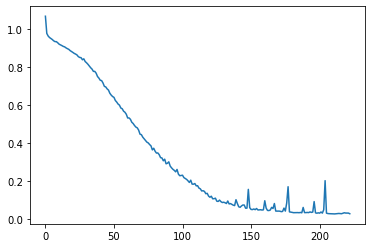

In [60]:
loss_values = classifier.loss_curve_
plt.plot(loss_values)
plt.show()

Accuracy of MLPClassifier : '' 0.989447


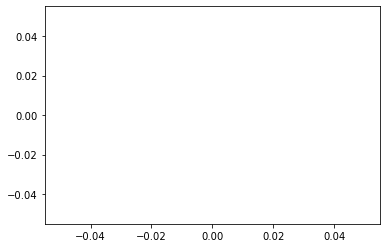

In [58]:
classifier = sklearn.neural_network.MLPClassifier(learning_rate = 'constant',alpha=0.001,hidden_layer_sizes=(128,64,10), max_iter=1000,activation = 'relu',solver='adam',random_state=1).fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy of MLPClassifier : ''", accuracy(cm))

loss_values = classifier.loss_curve_
plt.plot()
plt.show()

In [ ]:
class Net(nn.Module):
  def __init__(self, n_features):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(n_features, 5)
    self.fc2 = nn.Linear(5, 3)
    self.fc3 = nn.Linear(3, 1)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return torch.sigmoid(self.fc3(x))
net = Net(X_train.shape[1])